In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Загрузка датасета
df = pd.read_csv('malicious_phish.csv')
print(f"Размер датасета: {df.shape}")
df.head()

Размер датасета: (651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


Уникальные значения в столбце 'type':
['phishing' 'benign' 'defacement' 'malware']


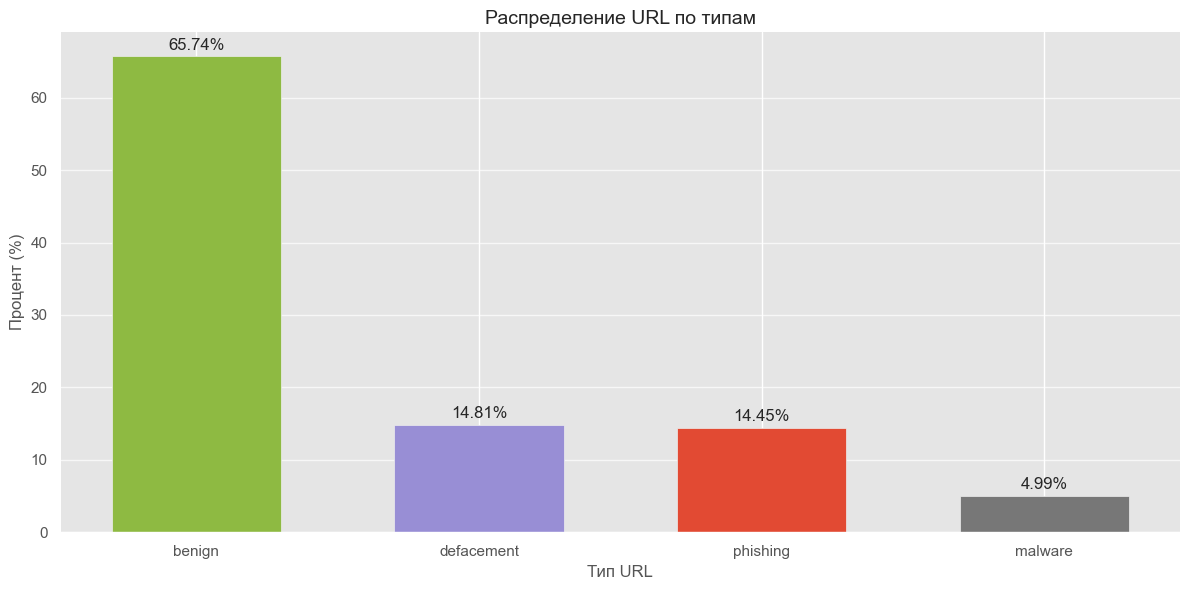


Распределение классов в датасете:
benign: 428103 URL (65.74%)
defacement: 96457 URL (14.81%)
phishing: 94111 URL (14.45%)
malware: 32520 URL (4.99%)


In [5]:
# Проверка всех уникальных значений
print("Уникальные значения в столбце 'type':")
print(df['type'].unique())

# Преобразование данных для отображения 4 классов
# Если категории отличаются, замените на актуальные значения из вашего датасета
category_colors = {
    'phishing': '#E24A33',    # красный
    'malicious': '#348ABD',   # синий
    'defacement': '#988ED5',  # фиолетовый
    'benign': '#8EBA42'       # зеленый
}

# Процентное соотношение классов
type_counts = df['type'].value_counts()
type_percent = type_counts / len(df) * 100

# Настройка стиля под ggplot
plt.style.use('ggplot')

# Построение bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(type_counts.index, type_percent.values, 
       color=[category_colors.get(x, '#777777') for x in type_counts.index],
       width=0.6)

# Стилизация под ggplot
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='-', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Подписи
plt.title('Распределение URL по типам', fontsize=14)
plt.xlabel('Тип URL', fontsize=12)
plt.ylabel('Процент (%)', fontsize=12)

# Добавление текстовых меток с процентами
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Вывод количественной информации
print("\nРаспределение классов в датасете:")
for category, count in type_counts.items():
    print(f"{category}: {count} URL ({type_percent[category]:.2f}%)")

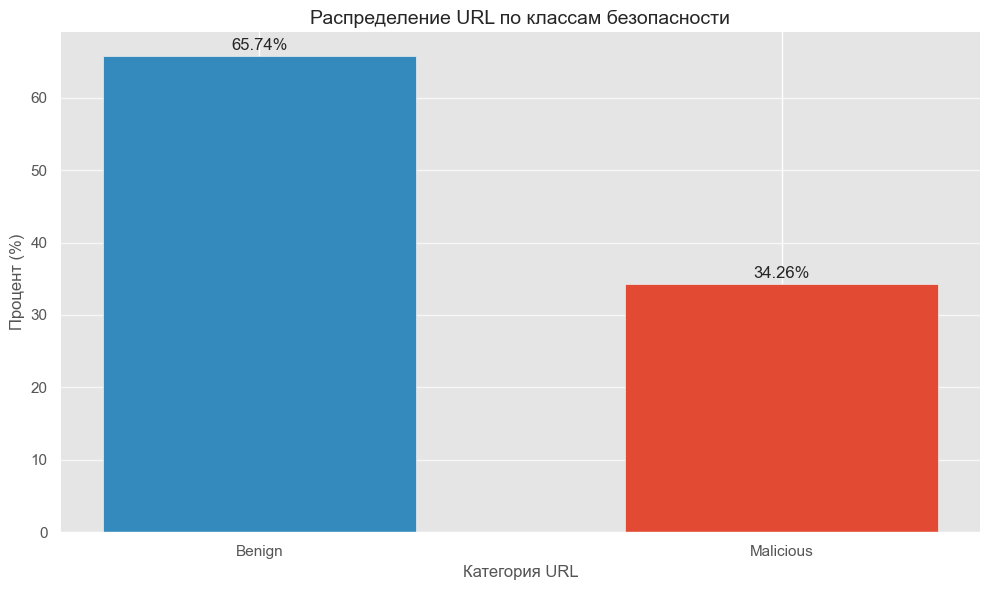

Распределение классов в датасете:
Benign: 428103 URL (65.74%)
Malicious: 223088 URL (34.26%)


In [4]:
# Преобразование данных для бинарной классификации
df['is_malicious'] = df['type'].apply(lambda x: 'Malicious' if x in ['defacement', 'phishing', 'malware', 'malicious'] else 'Benign')

# Процентное соотношение классов
binary_counts = df['is_malicious'].value_counts()
binary_percent = binary_counts / len(df) * 100

# Настройка стиля под ggplot
plt.style.use('ggplot')

# Построение bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(binary_percent.index, binary_percent.values, 
       color=['#E24A33' if x == 'Malicious' else '#348ABD' for x in binary_percent.index],
       width=0.6)

# Стилизация под ggplot
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='-', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Подписи
plt.title('Распределение URL по классам безопасности', fontsize=14)
plt.xlabel('Категория URL', fontsize=12)
plt.ylabel('Процент (%)', fontsize=12)

# Добавление текстовых меток с процентами
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.2f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Вывод количественной информации
print("Распределение классов в датасете:")
for category, count in binary_counts.items():
    print(f"{category}: {count} URL ({binary_percent[category]:.2f}%)")

In [ ]:
import pandas as pd
import numpy as np
import re
from urllib.parse import urlparse
import math
import tldextract

def extract_features(urls):
    """
    Извлечение признаков из списка URL для задачи классификации
    """
    features = pd.DataFrame()
    
    # 1. Длина URL и его компонентов
    features['url_length'] = urls.apply(len)
    
    # Парсинг URL для извлечения компонентов
    parsed_urls = urls.apply(lambda x: urlparse(x))
    extracted = urls.apply(lambda x: tldextract.extract(x))
    
    # 2. Домен и его компоненты
    features['domain_length'] = parsed_urls.apply(lambda x: len(x.netloc) if x.netloc else 0)
    features['path_length'] = parsed_urls.apply(lambda x: len(x.path) if x.path else 0)
    features['subdomain_length'] = extracted.apply(lambda x: len(x.subdomain) if x.subdomain else 0)
    features['tld_length'] = extracted.apply(lambda x: len(x.suffix) if x.suffix else 0)
    
    # 3. Количество определенных символов и компонентов
    features['dot_count'] = urls.apply(lambda x: x.count('.'))
    features['hyphen_count'] = urls.apply(lambda x: x.count('-'))
    features['underscore_count'] = urls.apply(lambda x: x.count('_'))
    features['slash_count'] = urls.apply(lambda x: x.count('/'))
    features['question_mark_count'] = urls.apply(lambda x: x.count('?'))
    features['equal_sign_count'] = urls.apply(lambda x: x.count('='))
    features['at_symbol_count'] = urls.apply(lambda x: x.count('@'))
    features['ampersand_count'] = urls.apply(lambda x: x.count('&'))
    features['exclamation_count'] = urls.apply(lambda x: x.count('!'))
    features['space_count'] = urls.apply(lambda x: x.count(' '))
    features['tilde_count'] = urls.apply(lambda x: x.count('~'))
    features['comma_count'] = urls.apply(lambda x: x.count(','))
    features['plus_count'] = urls.apply(lambda x: x.count('+'))
    features['asterisk_count'] = urls.apply(lambda x: x.count('*'))
    features['hash_count'] = urls.apply(lambda x: x.count('#'))
    features['dollar_count'] = urls.apply(lambda x: x.count('$'))
    features['percent_count'] = urls.apply(lambda x: x.count('%'))
    
    # 4. Другие полезные счетчики
    features['digit_count'] = urls.apply(lambda x: sum(c.isdigit() for c in x))
    features['letter_count'] = urls.apply(lambda x: sum(c.isalpha() for c in x))
    features['digit_letter_ratio'] = features['digit_count'] / (features['letter_count'] + 1)  # +1 чтобы избежать деления на 0
    
    # 5. Количество параметров в запросе
    features['param_count'] = parsed_urls.apply(lambda x: len(x.query.split('&')) if x.query else 0)
    
    # 6. Энтропия URL (мера случайности символов)
    def calculate_entropy(text):
        if not text:
            return 0
        entropy = 0
        text_length = len(text)
        char_count = {}
        
        for char in text:
            if char in char_count:
                char_count[char] += 1
            else:
                char_count[char] = 1
        
        for count in char_count.values():
            probability = count / text_length
            entropy -= probability * math.log2(probability)
        
        return entropy
    
    features['url_entropy'] = urls.apply(calculate_entropy)
    features['domain_entropy'] = parsed_urls.apply(lambda x: calculate_entropy(x.netloc) if x.netloc else 0)
    features['path_entropy'] = parsed_urls.apply(lambda x: calculate_entropy(x.path) if x.path else 0)
    
    # 7. Проверка на наличие IP-адреса вместо домена
    ip_pattern = re.compile(r'^(((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?))')
    features['has_ip_address'] = parsed_urls.apply(lambda x: 1 if ip_pattern.match(x.netloc) else 0)
    
    # 8. Количество директорий в пути
    features['dir_count'] = parsed_urls.apply(lambda x: x.path.count('/') if x.path else 0)
    
    # 9. Содержит ли URL определенные подозрительные слова
    suspicious_words = ['login', 'signin', 'verify', 'banking', 'secure', 'account', 'password', 'pwd', 'security']
    for word in suspicious_words:
        features[f'contains_{word}'] = urls.apply(lambda x: 1 if word in x.lower() else 0)
    
    # 10. Статистика по доменным зонам
    features['is_com'] = extracted.apply(lambda x: 1 if x.suffix == 'com' else 0)
    features['is_org'] = extracted.apply(lambda x: 1 if x.suffix == 'org' else 0)
    features['is_net'] = extracted.apply(lambda x: 1 if x.suffix == 'net' else 0)
    features['is_info'] = extracted.apply(lambda x: 1 if x.suffix == 'info' else 0)
    features['is_biz'] = extracted.apply(lambda x: 1 if x.suffix == 'biz' else 0)
    features['is_ru'] = extracted.apply(lambda x: 1 if x.suffix == 'ru' else 0)
    
    # 11. Базовые признаки для URL фишинга и вредоносных сайтов
    features['uses_https'] = urls.apply(lambda x: 1 if x.startswith('https://') else 0)
    features['is_shortened'] = urls.apply(lambda x: 1 if re.match(r'bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|ow\.ly|bit\.do', urlparse(x).netloc) else 0)
    
    return features

# Пример использования
if __name__ == "__main__":
    # Загрузка данных
    data = pd.read_csv('urls.csv')
    
    # Извлечение признаков
    url_features = extract_features(data['url'])
    
    # Объединение признаков с целевой переменной
    result = pd.concat([url_features, data['type']], axis=1)
    
    # Сохранение результатов
    result.to_csv('url_features.csv', index=False)
    
    # Вывод статистики по признакам
    print(url_features.describe())
    
    # Проверка на мультиколлинеарность
    corr_matrix = url_features.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    print(f"Признаки с высокой корреляцией (>0.95): {high_corr}")

In [7]:
import pandas as pd
import numpy as np
import re
from urllib.parse import urlparse
import math
import tldextract

def extract_features(urls):
    """
    Извлечение признаков из списка URL для задачи классификации
    """
    features = pd.DataFrame()
    
    # 1. Длина URL и его компонентов
    features['url_length'] = urls.apply(len)
    
    # Парсинг URL для извлечения компонентов
    parsed_urls = urls.apply(lambda x: urlparse(x))
    extracted = urls.apply(lambda x: tldextract.extract(x))
    
    # 2. Домен и его компоненты
    features['domain_length'] = parsed_urls.apply(lambda x: len(x.netloc) if x.netloc else 0)
    features['path_length'] = parsed_urls.apply(lambda x: len(x.path) if x.path else 0)
    features['subdomain_length'] = extracted.apply(lambda x: len(x.subdomain) if x.subdomain else 0)
    features['tld_length'] = extracted.apply(lambda x: len(x.suffix) if x.suffix else 0)
    
    # 3. Количество определенных символов и компонентов
    features['dot_count'] = urls.apply(lambda x: x.count('.'))
    features['hyphen_count'] = urls.apply(lambda x: x.count('-'))
    features['underscore_count'] = urls.apply(lambda x: x.count('_'))
    features['slash_count'] = urls.apply(lambda x: x.count('/'))
    features['question_mark_count'] = urls.apply(lambda x: x.count('?'))
    features['equal_sign_count'] = urls.apply(lambda x: x.count('='))
    features['at_symbol_count'] = urls.apply(lambda x: x.count('@'))
    features['ampersand_count'] = urls.apply(lambda x: x.count('&'))
    features['exclamation_count'] = urls.apply(lambda x: x.count('!'))
    features['space_count'] = urls.apply(lambda x: x.count(' '))
    features['tilde_count'] = urls.apply(lambda x: x.count('~'))
    features['comma_count'] = urls.apply(lambda x: x.count(','))
    features['plus_count'] = urls.apply(lambda x: x.count('+'))
    features['asterisk_count'] = urls.apply(lambda x: x.count('*'))
    features['hash_count'] = urls.apply(lambda x: x.count('#'))
    features['dollar_count'] = urls.apply(lambda x: x.count('$'))
    features['percent_count'] = urls.apply(lambda x: x.count('%'))
    
    # 4. Другие полезные счетчики
    features['digit_count'] = urls.apply(lambda x: sum(c.isdigit() for c in x))
    features['letter_count'] = urls.apply(lambda x: sum(c.isalpha() for c in x))
    features['digit_letter_ratio'] = features['digit_count'] / (features['letter_count'] + 1)  # +1 чтобы избежать деления на 0
    
    # 5. Количество параметров в запросе
    features['param_count'] = parsed_urls.apply(lambda x: len(x.query.split('&')) if x.query else 0)
    
    # 6. Энтропия URL (мера случайности символов)
    def calculate_entropy(text):
        if not text:
            return 0
        entropy = 0
        text_length = len(text)
        char_count = {}
        
        for char in text:
            if char in char_count:
                char_count[char] += 1
            else:
                char_count[char] = 1
        
        for count in char_count.values():
            probability = count / text_length
            entropy -= probability * math.log2(probability)
        
        return entropy
    
    features['url_entropy'] = urls.apply(calculate_entropy)
    features['domain_entropy'] = parsed_urls.apply(lambda x: calculate_entropy(x.netloc) if x.netloc else 0)
    features['path_entropy'] = parsed_urls.apply(lambda x: calculate_entropy(x.path) if x.path else 0)
    
    # 7. Проверка на наличие IP-адреса вместо домена
    ip_pattern = re.compile(r'^(((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?))')
    features['has_ip_address'] = parsed_urls.apply(lambda x: 1 if ip_pattern.match(x.netloc) else 0)
    
    # 8. Количество директорий в пути
    features['dir_count'] = parsed_urls.apply(lambda x: x.path.count('/') if x.path else 0)
    
    # 9. Содержит ли URL определенные подозрительные слова
    suspicious_words = ['login', 'signin', 'verify', 'banking', 'secure', 'account', 'password', 'pwd', 'security']
    for word in suspicious_words:
        features[f'contains_{word}'] = urls.apply(lambda x: 1 if word in x.lower() else 0)
    
    # 10. Статистика по доменным зонам
    features['is_com'] = extracted.apply(lambda x: 1 if x.suffix == 'com' else 0)
    features['is_org'] = extracted.apply(lambda x: 1 if x.suffix == 'org' else 0)
    features['is_net'] = extracted.apply(lambda x: 1 if x.suffix == 'net' else 0)
    features['is_info'] = extracted.apply(lambda x: 1 if x.suffix == 'info' else 0)
    features['is_biz'] = extracted.apply(lambda x: 1 if x.suffix == 'biz' else 0)
    features['is_ru'] = extracted.apply(lambda x: 1 if x.suffix == 'ru' else 0)
    
    # 11. Базовые признаки для URL фишинга и вредоносных сайтов
    features['uses_https'] = urls.apply(lambda x: 1 if x.startswith('https://') else 0)
    features['is_shortened'] = urls.apply(lambda x: 1 if re.match(r'bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|ow\.ly|bit\.do', urlparse(x).netloc) else 0)
    
    return features

# Пример использования
if __name__ == "__main__":
    # Загрузка данных
    data = pd.read_csv('malicious_phish.csv')
    
    # Извлечение признаков
    url_features = extract_features(data['url'])
    
    # Объединение признаков с целевой переменной
    result = pd.concat([url_features, data['type']], axis=1)
    
    # Сохранение результатов
    result.to_csv('url_features.csv', index=False)
    
    # Вывод статистики по признакам
    print(url_features.describe())
    
    # Проверка на мультиколлинеарность
    corr_matrix = url_features.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
    print(f"Признаки с высокой корреляцией (>0.95): {high_corr}")

          url_length  domain_length    path_length  subdomain_length  \
count  651191.000000  651191.000000  651191.000000     651191.000000   
mean       60.156831       5.023088      41.153821          3.136728   
std        44.753902       8.911953      29.770331         10.204764   
min         1.000000       0.000000       0.000000          0.000000   
25%        32.000000       0.000000      21.000000          0.000000   
50%        47.000000       0.000000      35.000000          0.000000   
75%        77.000000      11.000000      53.000000          3.000000   
max      2175.000000     236.000000    2175.000000        230.000000   

          tld_length      dot_count   hyphen_count  underscore_count  \
count  651191.000000  651191.000000  651191.000000     651191.000000   
mean        2.993756       2.195453       1.550421          0.423026   
std         0.906529       1.490732       2.973790          1.173615   
min         0.000000       0.000000       0.000000          0.0